# QuTiP example: Quantum Gates and their usage

Author: Anubhav Vardhan (anubhavvardhan@gmail.com)

User-defined gate added by: Boxi Li (etamin1201@gmail.com)

For more information about QuTiP see [http://qutip.org](http://qutip.org)

#### Installation: 
The circuit image visualization requires LaTeX and [ImageMagick](https://imagemagick.org/index.php) for display. The module automatically process the LaTeX code for plotting the circuit, generate the pdf and convert it to the png format.
On Mac and Linux, ImageMagick can be easily installed with the command `conda install imagemagick` if you have conda installed.
Otherwise, please follow the installation instructions on the ImageMagick documentation.

On windows, you need to download and install ImageMagick installer. In addition, you also need [perl](https://www.perl.org/get.html) (for pdfcrop) and [Ghostscript](https://ghostscript.com/releases/index.html) (additional dependency of ImageMagick for png conversion).

To test if the installation is complete, try the following three commands working correctly in Command Prompt: `pdflatex`, `pdfcrop` and `magick anypdf.pdf antpdf.png`, where `anypdf.pdf` is any pdf file you have.

In [1]:
import numpy as np
from numpy import pi
from qutip import Qobj, about
from qutip_qip.circuit import QubitCircuit
from qutip_qip.operations import (Gate, berkeley, cnot, cphase, csign, fredkin,
                                  gate_sequence_product, globalphase, iswap,
                                  molmer_sorensen, phasegate, qrot, rx, ry, rz,
                                  snot, sqrtiswap, sqrtnot, sqrtswap, swap,
                                  swapalpha, toffoli)

%matplotlib inline

## Introduction

http://en.wikipedia.org/wiki/Quantum_gate


## Gates in QuTiP and their representation

### Controlled-PHASE

In [2]:
cphase(pi / 2)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=False
Qobj data =
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j]]

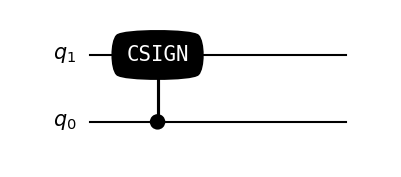

In [3]:
q = QubitCircuit(2, reverse_states=False)
q.add_gate("CSIGN", controls=[0], targets=[1])
q.draw()

### Rotation about X-axis

In [4]:
rx(pi / 2)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.70710678+0.j         0.        -0.70710678j]
 [0.        -0.70710678j 0.70710678+0.j        ]]

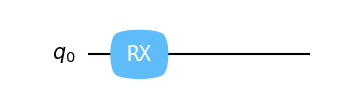

In [5]:
q = QubitCircuit(1, reverse_states=False)
q.add_gate("RX", targets=[0], arg_value=pi / 2, style={"showarg": True})
q.draw()

### Rotation about Y-axis

In [6]:
ry(pi / 2)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

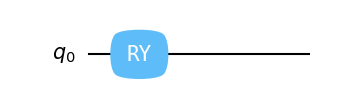

In [7]:
q = QubitCircuit(1, reverse_states=False)
q.add_gate("RY", targets=[0], arg_value=pi / 2, style={"showarg": True})
q.draw()

### Rotation about Z-axis

In [8]:
rz(pi / 2)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.70710678-0.70710678j 0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]

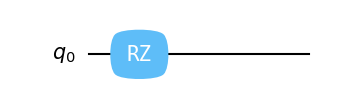

In [9]:
q = QubitCircuit(1, reverse_states=False)
q.add_gate("RZ", targets=[0], arg_value=pi / 2, style={"showarg": True})
q.draw()

### CNOT

In [10]:
cnot()

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

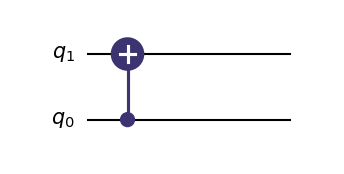

In [11]:
q = QubitCircuit(2, reverse_states=False)
q.add_gate("CNOT", controls=[0], targets=[1])
q.draw()

### CSIGN

In [12]:
csign()

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]

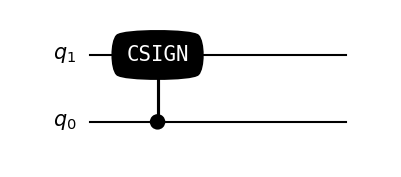

In [13]:
q = QubitCircuit(2, reverse_states=False)
q.add_gate("CSIGN", controls=[0], targets=[1])
q.draw()

### Berkeley

In [14]:
berkeley()

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.92387953+0.j         0.        +0.j         0.        +0.j
  0.        +0.38268343j]
 [0.        +0.j         0.38268343+0.j         0.        +0.92387953j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.92387953j 0.38268343+0.j
  0.        +0.j        ]
 [0.        +0.38268343j 0.        +0.j         0.        +0.j
  0.92387953+0.j        ]]

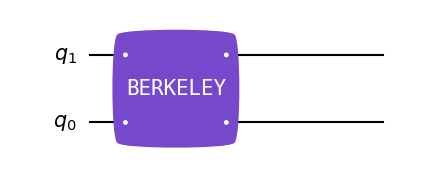

In [15]:
q = QubitCircuit(2, reverse_states=False)
q.add_gate("BERKELEY", targets=[0, 1])
q.draw()

### SWAPalpha

In [16]:
swapalpha(pi / 2)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[1.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.61029202-0.48768399j 0.38970798+0.48768399j
  0.        +0.j        ]
 [0.        +0.j         0.38970798+0.48768399j 0.61029202-0.48768399j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  1.        +0.j        ]]

### FREDKIN

In [17]:
fredkin()

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]

### TOFFOLI

In [18]:
toffoli()

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]

### SWAP

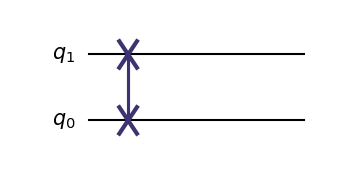

In [19]:
swap()
q = QubitCircuit(2, reverse_states=False)
q.add_gate("SWAP", targets=[0, 1])
q.draw()

### ISWAP

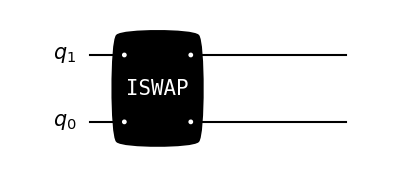

In [20]:
iswap()
q = QubitCircuit(2, reverse_states=False)
q.add_gate("ISWAP", targets=[0, 1])
q.draw()

### SQRTiSWAP

In [21]:
sqrtiswap()

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[1.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.70710678+0.j         0.        +0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.70710678j 0.70710678+0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  1.        +0.j        ]]

### SQRTSWAP

In [22]:
sqrtswap()

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[1. +0.j  0. +0.j  0. +0.j  0. +0.j ]
 [0. +0.j  0.5+0.5j 0.5-0.5j 0. +0.j ]
 [0. +0.j  0.5-0.5j 0.5+0.5j 0. +0.j ]
 [0. +0.j  0. +0.j  0. +0.j  1. +0.j ]]

### SQRTNOT

In [23]:
sqrtnot()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.5+0.5j 0.5-0.5j]
 [0.5-0.5j 0.5+0.5j]]

### HADAMARD

In [24]:
snot()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

### PHASEGATE

In [25]:
phasegate(pi / 2)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[1.000000e+00+0.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 6.123234e-17+1.j]]

### GLOBALPHASE

In [26]:
globalphase(pi / 2)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=False
Qobj data =
[[6.123234e-17+1.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 6.123234e-17+1.j]]

### Mølmer–Sørensen gate

In [27]:
molmer_sorensen(pi / 2)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.70710678+0.j         0.        +0.j         0.        +0.j
  0.        -0.70710678j]
 [0.        +0.j         0.70710678+0.j         0.        -0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.        -0.70710678j 0.70710678+0.j
  0.        +0.j        ]
 [0.        -0.70710678j 0.        +0.j         0.        +0.j
  0.70710678+0.j        ]]

### Qubit rotation gate

In [28]:
qrot(pi / 2, pi / 4)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.70710678+0.j  -0.5       -0.5j]
 [ 0.5       -0.5j  0.70710678+0.j ]]

### Expanding gates to larger qubit registers

The example above show how to generate matrice representations of the gates implemented in QuTiP, in their minimal qubit requirements. If the same gates is to be represented in a qubit register of size $N$, the optional keywork argument `N` can be specified when calling the gate function. For example, to generate the matrix for the CNOT gate for a $N=3$ bit register:

In [29]:
cnot(N=3)

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]

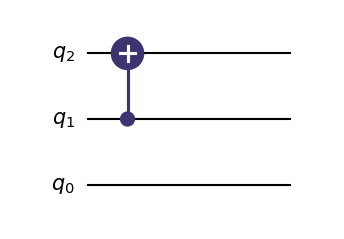

In [30]:
q = QubitCircuit(3, reverse_states=False)
q.add_gate("CNOT", controls=[1], targets=[2])
q.draw()

Furthermore, the control and target qubits (when applicable) can also be similarly specified using keyword arguments `control` and `target` (or in some cases `controls` or `targets`):

In [31]:
cnot(N=3, control=2, target=0)

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]

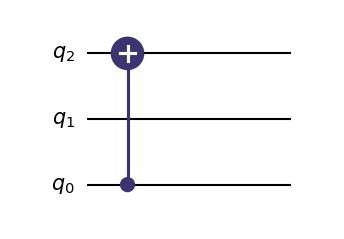

In [32]:
q = QubitCircuit(3, reverse_states=False)
q.add_gate("CNOT", controls=[0], targets=[2])
q.draw()

## Setup of a Qubit Circuit

The gates implemented in QuTiP can be used to build any qubit circuit using the class QubitCircuit. The output can be obtained in the form of a unitary matrix or a latex representation.

In the following example, we take a SWAP gate. It is known that a swap gate is equivalent to three CNOT gates applied in the given format.

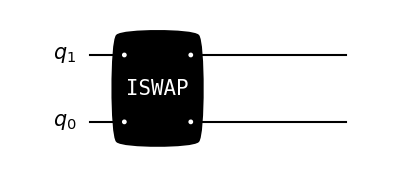

In [33]:
N = 2
qc0 = QubitCircuit(N)
qc0.add_gate("ISWAP", [0, 1], None)
qc0.draw()

In [34]:
U_list0 = qc0.propagators()
U0 = gate_sequence_product(U_list0)
U0

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

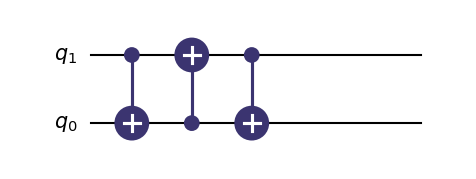

In [35]:
qc1 = QubitCircuit(N)
qc1.add_gate("CNOT", 0, 1)
qc1.add_gate("CNOT", 1, 0)
qc1.add_gate("CNOT", 0, 1)
qc1.draw()

In [36]:
U_list1 = qc1.propagators()
U1 = gate_sequence_product(U_list1)
U1

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

In place of manually converting the SWAP gate to CNOTs, it can be automatically converted using an inbuilt function in QubitCircuit

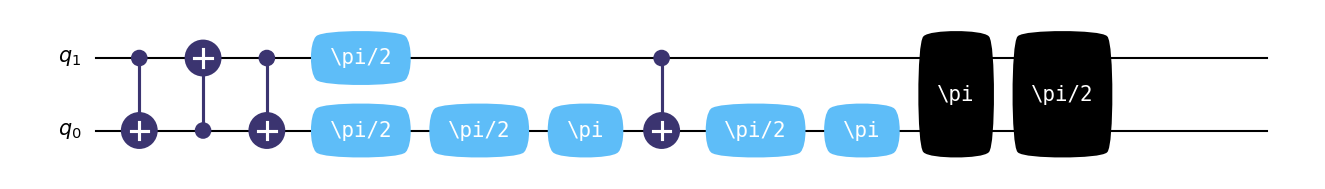

In [37]:
qc2 = qc0.resolve_gates("CNOT")
qc2.draw()

In [38]:
U_list2 = qc2.propagators()
U2 = gate_sequence_product(U_list2)
U2

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 1.00000000e+00+3.83475851e-17j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   1.83697020e-16+1.00000000e+00j -2.22044605e-16+9.00927388e-32j]
 [ 0.00000000e+00+0.00000000e+00j  1.83697020e-16+1.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   4.07889322e-32+2.22044605e-16j  1.00000000e+00-4.05741625e-16j]]

From QuTiP 4.4, we can also add gate at arbitrary position in a circuit.

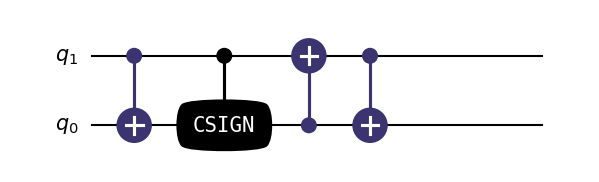

In [39]:
qc1.add_gate("CSIGN", index=[1], targets=[0], controls=[1])
qc1.draw()

## Example of basis transformation

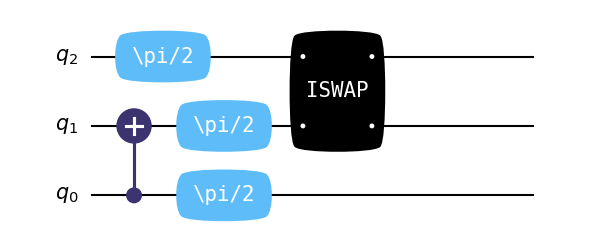

In [40]:
qc3 = QubitCircuit(3)
qc3.add_gate("CNOT", 1, 0)
qc3.add_gate("RX", 0, None, pi / 2, r"\pi/2")
qc3.add_gate("RY", 1, None, pi / 2, r"\pi/2")
qc3.add_gate("RZ", 2, None, pi / 2, r"\pi/2")
qc3.add_gate("ISWAP", [1, 2])
qc3.draw()

In [41]:
U3 = gate_sequence_product(qc3.propagators())
U3

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=False
Qobj data =
[[ 0.35355339-0.35355339j  0.        +0.j         -0.35355339+0.35355339j
   0.        +0.j          0.35355339+0.35355339j  0.        +0.j
  -0.35355339-0.35355339j  0.        +0.j        ]
 [ 0.35355339+0.35355339j  0.        +0.j          0.35355339+0.35355339j
   0.        +0.j          0.35355339-0.35355339j  0.        +0.j
   0.35355339-0.35355339j  0.        +0.j        ]
 [ 0.        +0.j         -0.35355339+0.35355339j  0.        +0.j
   0.35355339-0.35355339j  0.        +0.j         -0.35355339-0.35355339j
   0.        +0.j          0.35355339+0.35355339j]
 [ 0.        +0.j          0.35355339+0.35355339j  0.        +0.j
   0.35355339+0.35355339j  0.        +0.j          0.35355339-0.35355339j
   0.        +0.j          0.35355339-0.35355339j]
 [-0.35355339-0.35355339j  0.        +0.j          0.35355339+0.35355339j
   0.        +0.j         -0.35355339+0.35355339j  0. 

### The transformation can either be only in terms of 2-qubit gates:

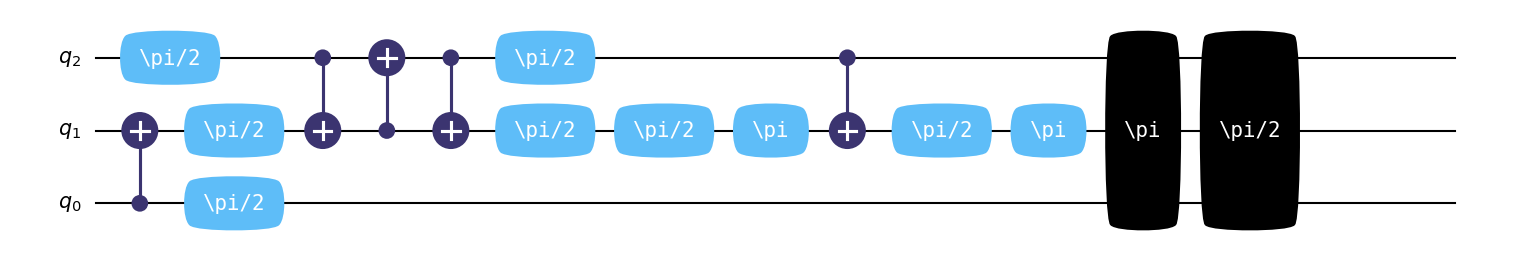

In [42]:
qc4 = qc3.resolve_gates("CNOT")
qc4.draw()

In [43]:
U4 = gate_sequence_product(qc4.propagators())
U4

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=False
Qobj data =
[[ 0.35355339-0.35355339j  0.        +0.j         -0.35355339+0.35355339j
   0.        +0.j          0.35355339+0.35355339j  0.        +0.j
  -0.35355339-0.35355339j  0.        +0.j        ]
 [ 0.35355339+0.35355339j  0.        +0.j          0.35355339+0.35355339j
   0.        +0.j          0.35355339-0.35355339j  0.        +0.j
   0.35355339-0.35355339j  0.        +0.j        ]
 [ 0.        +0.j         -0.35355339+0.35355339j  0.        +0.j
   0.35355339-0.35355339j  0.        +0.j         -0.35355339-0.35355339j
   0.        +0.j          0.35355339+0.35355339j]
 [ 0.        +0.j          0.35355339+0.35355339j  0.        +0.j
   0.35355339+0.35355339j  0.        +0.j          0.35355339-0.35355339j
   0.        +0.j          0.35355339-0.35355339j]
 [-0.35355339-0.35355339j  0.        +0.j          0.35355339+0.35355339j
   0.        +0.j         -0.35355339+0.35355339j  0. 

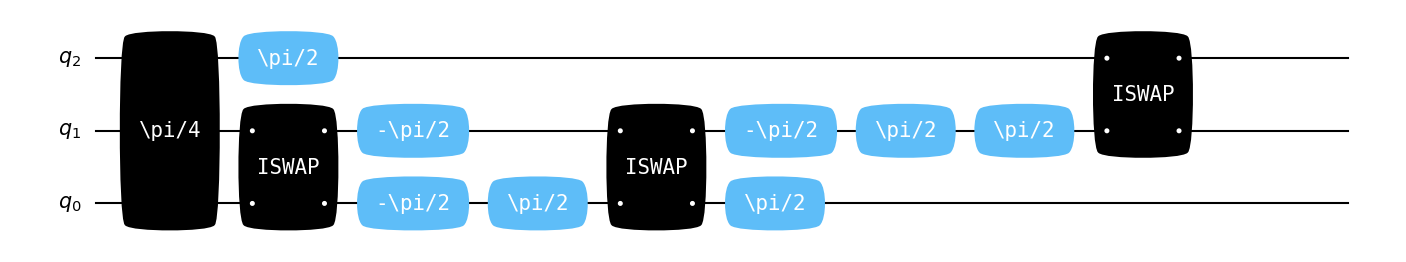

In [44]:
qc5 = qc3.resolve_gates("ISWAP")
qc5.draw()

In [45]:
U5 = gate_sequence_product(qc5.propagators())
U5

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=False
Qobj data =
[[ 0.35355339-0.35355339j  0.        +0.j         -0.35355339+0.35355339j
   0.        +0.j          0.35355339+0.35355339j  0.        +0.j
  -0.35355339-0.35355339j  0.        +0.j        ]
 [ 0.35355339+0.35355339j  0.        +0.j          0.35355339+0.35355339j
   0.        +0.j          0.35355339-0.35355339j  0.        +0.j
   0.35355339-0.35355339j  0.        +0.j        ]
 [ 0.        +0.j         -0.35355339+0.35355339j  0.        +0.j
   0.35355339-0.35355339j  0.        +0.j         -0.35355339-0.35355339j
   0.        +0.j          0.35355339+0.35355339j]
 [ 0.        +0.j          0.35355339+0.35355339j  0.        +0.j
   0.35355339+0.35355339j  0.        +0.j          0.35355339-0.35355339j
   0.        +0.j          0.35355339-0.35355339j]
 [-0.35355339-0.35355339j  0.        +0.j          0.35355339+0.35355339j
   0.        +0.j         -0.35355339+0.35355339j  0. 

### Or the transformation can be in terms of any 2 single qubit rotation gates along with the 2-qubit gate.

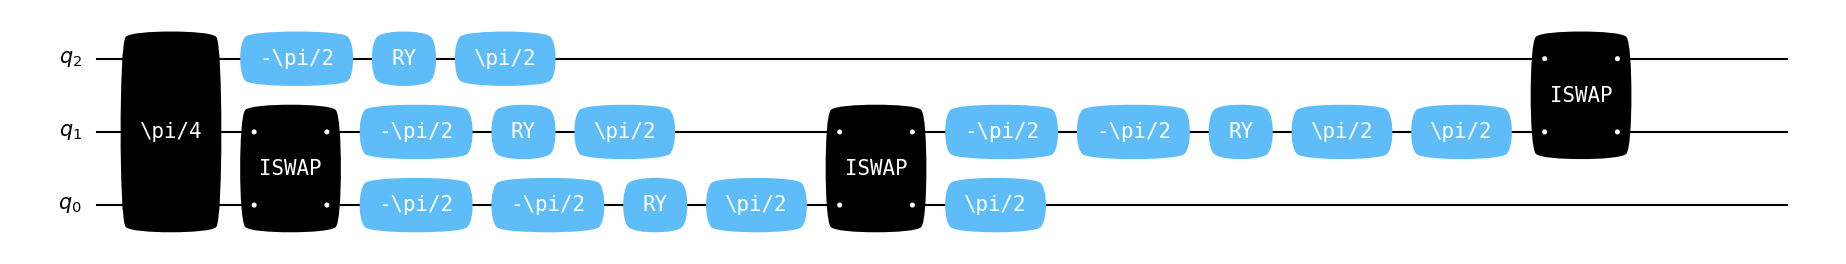

In [46]:
qc6 = qc3.resolve_gates(["ISWAP", "RX", "RY"])
qc6.draw()

In [47]:
U6 = gate_sequence_product(qc6.propagators())
U6

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=False
Qobj data =
[[ 0.35355339-0.35355339j  0.        +0.j         -0.35355339+0.35355339j
   0.        +0.j          0.35355339+0.35355339j  0.        +0.j
  -0.35355339-0.35355339j  0.        +0.j        ]
 [ 0.35355339+0.35355339j  0.        +0.j          0.35355339+0.35355339j
   0.        +0.j          0.35355339-0.35355339j  0.        +0.j
   0.35355339-0.35355339j  0.        +0.j        ]
 [ 0.        +0.j         -0.35355339+0.35355339j  0.        +0.j
   0.35355339-0.35355339j  0.        +0.j         -0.35355339-0.35355339j
   0.        +0.j          0.35355339+0.35355339j]
 [ 0.        +0.j          0.35355339+0.35355339j  0.        +0.j
   0.35355339+0.35355339j  0.        +0.j          0.35355339-0.35355339j
   0.        +0.j          0.35355339-0.35355339j]
 [-0.35355339-0.35355339j  0.        +0.j          0.35355339+0.35355339j
   0.        +0.j         -0.35355339+0.35355339j  0. 

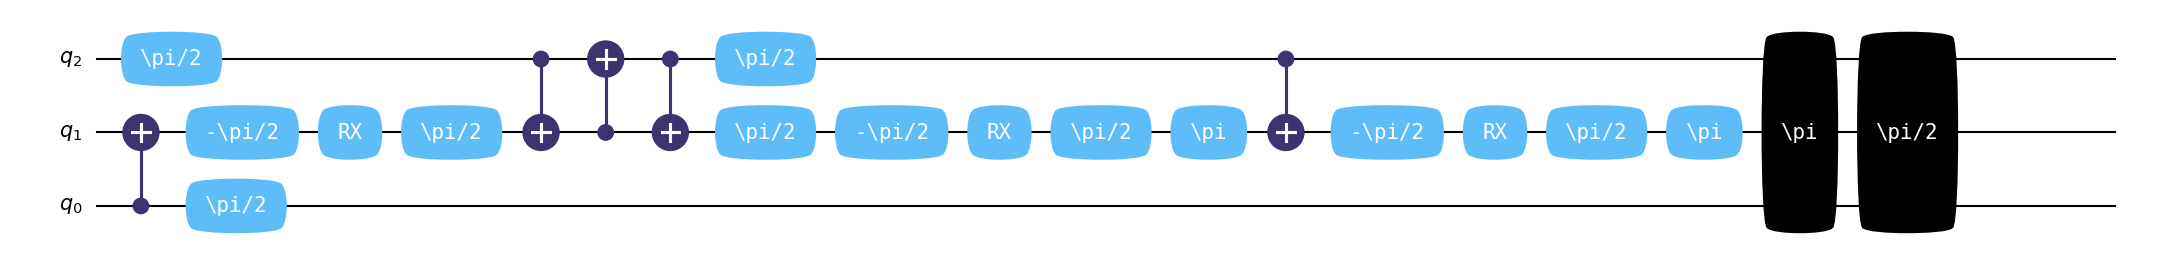

In [48]:
qc7 = qc3.resolve_gates(["CNOT", "RZ", "RX"])
qc7.draw()

In [49]:
U7 = gate_sequence_product(qc7.propagators())
U7

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=False
Qobj data =
[[ 0.35355339-0.35355339j  0.        +0.j         -0.35355339+0.35355339j
   0.        +0.j          0.35355339+0.35355339j  0.        +0.j
  -0.35355339-0.35355339j  0.        +0.j        ]
 [ 0.35355339+0.35355339j  0.        +0.j          0.35355339+0.35355339j
   0.        +0.j          0.35355339-0.35355339j  0.        +0.j
   0.35355339-0.35355339j  0.        +0.j        ]
 [ 0.        +0.j         -0.35355339+0.35355339j  0.        +0.j
   0.35355339-0.35355339j  0.        +0.j         -0.35355339-0.35355339j
   0.        +0.j          0.35355339+0.35355339j]
 [ 0.        +0.j          0.35355339+0.35355339j  0.        +0.j
   0.35355339+0.35355339j  0.        +0.j          0.35355339-0.35355339j
   0.        +0.j          0.35355339-0.35355339j]
 [-0.35355339-0.35355339j  0.        +0.j          0.35355339+0.35355339j
   0.        +0.j         -0.35355339+0.35355339j  0. 

## Resolving non-adjacent interactions

Interactions between non-adjacent qubits can be resolved by QubitCircuit to a series of adjacent interactions, which is useful for systems such as spin chain models.

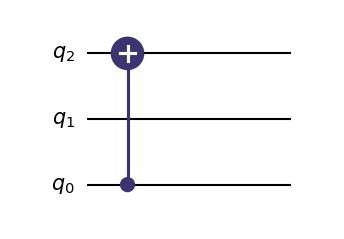

In [50]:
qc8 = QubitCircuit(3)
qc8.add_gate("CNOT", 2, 0)
qc8.draw()

In [51]:
U8 = gate_sequence_product(qc8.propagators())
U8

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]

In [52]:
qc9 = qc8.adjacent_gates()
qc9.gates

[Gate(SWAP, targets=[0, 1], controls=None, classical controls=None, control_value=None, classical_control_value=None),
 Gate(CNOT, targets=[2], controls=[1], classical controls=None, control_value=None, classical_control_value=None),
 Gate(SWAP, targets=[0, 1], controls=None, classical controls=None, control_value=None, classical_control_value=None)]

In [53]:
U9 = gate_sequence_product(qc9.propagators())
U9

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]

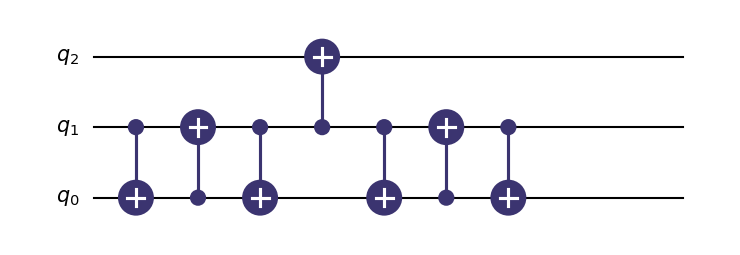

In [54]:
qc10 = qc9.resolve_gates("CNOT")
qc10.draw()

In [55]:
U10 = gate_sequence_product(qc10.propagators())
U10

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]

## Adding gate in the middle of a circuit
From QuTiP 4.4 one can add a gate at an arbitrary position of a circuit. All one needs to do is to specify the parameter index. With this, we can also add the same gate at multiple positions at the same time.

In [56]:
qc = QubitCircuit(1)
qc.add_gate("RX", targets=1, arg_value=np.pi / 2)
qc.add_gate("RX", targets=1, arg_value=np.pi / 2)
qc.add_gate("RY", targets=1, arg_value=np.pi / 2, index=[0])
qc.gates

[Gate(RY, targets=[1], controls=None, classical controls=None, control_value=None, classical_control_value=None),
 Gate(RX, targets=[1], controls=None, classical controls=None, control_value=None, classical_control_value=None),
 Gate(RX, targets=[1], controls=None, classical controls=None, control_value=None, classical_control_value=None)]

## User defined gates
From QuTiP 4.4 on, user defined gates can be defined by a python function that takes at most one parameter and return a `Qobj`, the dimension of the `Qobj` has to match the qubit system.

In [57]:
def user_gate1(arg_value):
    # controlled rotation X
    mat = np.zeros((4, 4), dtype=complex)
    mat[0, 0] = mat[1, 1] = 1.0
    mat[2:4, 2:4] = rx(arg_value).full()
    return Qobj(mat, dims=[[2, 2], [2, 2]])


def user_gate2():
    # S gate
    mat = np.array([[1.0, 0], [0.0, 1.0j]])
    return Qobj(mat, dims=[[2], [2]])

To let the `QubitCircuit` process those gates, we need to modify its attribute `QubitCircuit.user_gates`, which is a python dictionary in the form `{name: gate_function}`.

In [58]:
qc = QubitCircuit(2)
qc.user_gates = {"CTRLRX": user_gate1, "S": user_gate2}

When calling the `add_gate` method, the target qubits and the argument need to be given.

In [59]:
# qubit 0 controls qubit 1
qc.add_gate("CTRLRX", targets=[0, 1], arg_value=pi / 2)
# qubit 1 controls qubit 0
qc.add_gate("CTRLRX", targets=[1, 0], arg_value=pi / 2)
# a gate can also be added using the Gate class
g_T = Gate("S", targets=[1])
qc.add_gate("S", targets=[1])
props = qc.propagators()

In [60]:
props[0]  # qubit 0 controls qubit 1

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[1.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         1.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.70710678+0.j
  0.        -0.70710678j]
 [0.        +0.j         0.        +0.j         0.        -0.70710678j
  0.70710678+0.j        ]]

In [61]:
props[1]  # qubit 1 controls qubit 0

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[1.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.70710678+0.j         0.        +0.j
  0.        -0.70710678j]
 [0.        +0.j         0.        +0.j         1.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        -0.70710678j 0.        +0.j
  0.70710678+0.j        ]]

In [62]:
props[2]  # S  gate acts on qubit 1

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=False
Qobj data =
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j]]

## Software versions

In [63]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Simon Cross, Asier Galicia, Paul Menczel, and Patrick Hopf.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      5.3.0.dev0+6e4b53d
Numpy Version:      2.3.5
Scipy Version:      1.16.3
Cython Version:     3.2.2
Matplotlib Version: 3.10.8
Python Version:     3.12.0
Number of CPUs:     4
BLAS Info:          blas
INTEL MKL Ext:      None
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/miniconda3/envs/test-environment-v5/lib/python3.12/site-packages/qutip

Installed QuTiP family packages
-------------------------------

qutip-qtrl: 

qutip-jax: 0.1.1.dev6
qutip-qip: 0.5.0.dev0+81a92b9

Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`
